In [2]:
import pandas as pd
import numpy as np 



In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

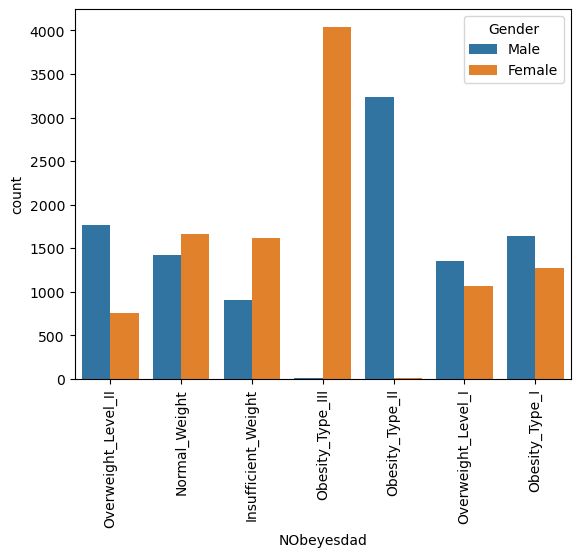

In [7]:
sns.countplot(data=data, x="NObeyesdad", hue="Gender")
plt.xticks(rotation=90)  
plt.show()

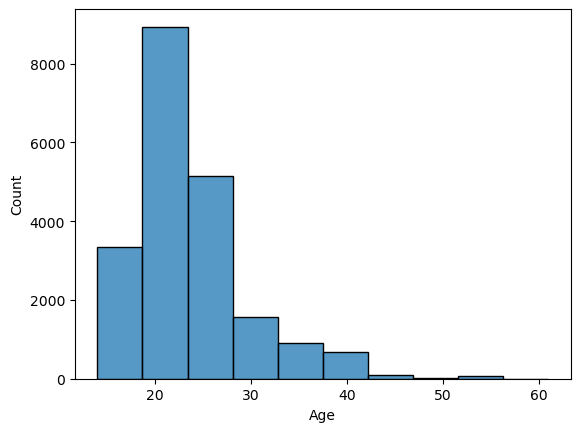

In [8]:
sns.histplot(data=data, x="Age", bins=10)
plt.show()

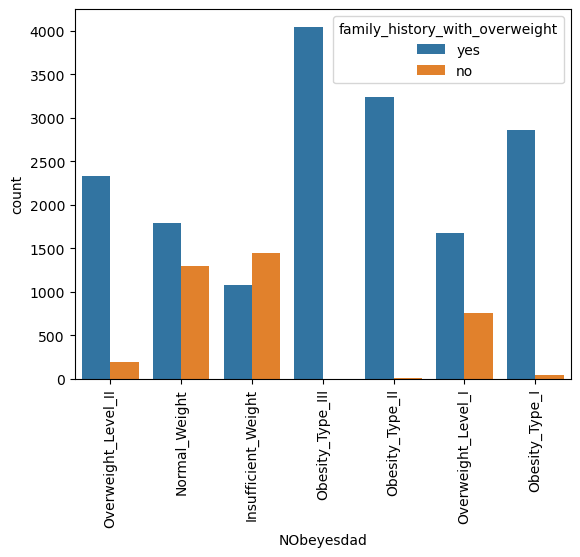

In [9]:
sns.countplot(data=data, x="NObeyesdad", hue="family_history_with_overweight")
plt.xticks(rotation=90)  
plt.show()

In [10]:
data['bmi']=data['Weight']/data['Height']/data['Height']

<Axes: xlabel='bmi', ylabel='Count'>

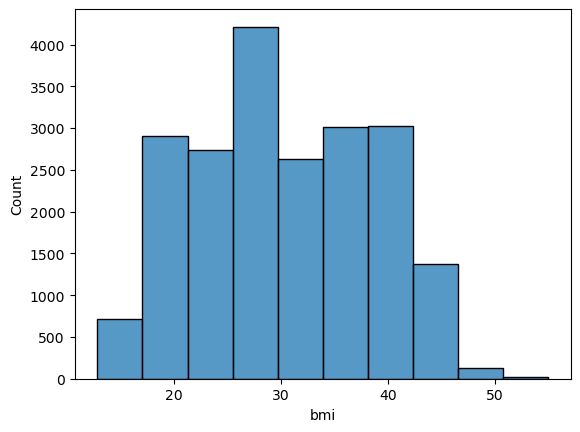

In [11]:
sns.histplot(data=data, x="bmi", bins=10)


In [12]:
bins = [0, 18, 24, 30, 40,60]  
labels = ['insuffisant', 'normal', 'over', 'obese','massive']

data['bmi_type'] = pd.cut(data['bmi'], bins=bins, labels=labels)

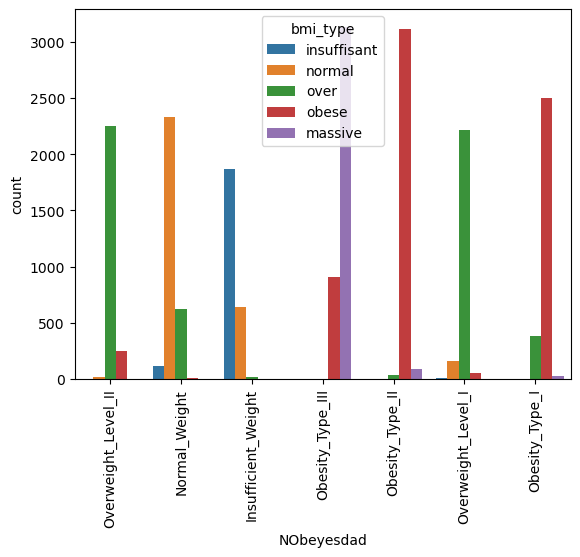

In [13]:
sns.countplot(data=data, hue="bmi_type", x="NObeyesdad")
plt.xticks(rotation=90)  
plt.show()

In [14]:

columns_to_transform=[]
for c in data.columns:
    if data[c].dtype=='object' or data[c].dtype=='category' :
         columns_to_transform.append(c)

In [15]:

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in columns_to_transform:
    data[col] = le.fit_transform(data[col])

In [16]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,bmi,bmi_type
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6,28.259565,4
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,23.422091,2
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,17.126706,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4,44.855798,1
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6,25.599151,4


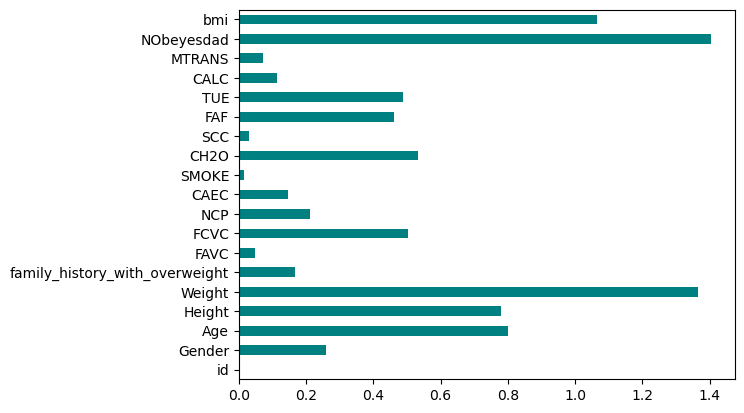

In [17]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(data.drop('NObeyesdad', axis=1), data['NObeyesdad'])
f_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
f_importances.plot(kind='barh', color='teal')
plt.show()  


In [18]:
data1=pd.read_csv('train.csv')

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the 'NObeyesdad' column and convert it to a DataFrame
encoded = pd.DataFrame(ohe.fit_transform(data1[['NObeyesdad']]).toarray())

# Get the categories of the encoder
categories = ohe.categories_[0]

# Rename the columns of the encoded DataFrame
encoded.columns = categories

# Concatenate the original DataFrame with the encoded DataFrame
data1_encoded = pd.concat([data1.drop(columns=['NObeyesdad']), encoded], axis=1)


In [20]:
data=pd.concat([data, encoded], axis=1)

In [21]:

data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,NObeyesdad,bmi,bmi_type,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,...,6,28.259565,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,...,1,23.422091,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,...,0,17.126706,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,...,4,44.855798,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,...,6,25.599151,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'bmi', 'bmi_type', 'Insufficient_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
       'Overweight_Level_I', 'Overweight_Level_II'],
      dtype='object')

In [23]:
y=data.drop(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'bmi', 'bmi_type'],axis=1)
x=data.drop(['id','NObeyesdad','Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'],axis=1)

In [24]:
data.drop(['NObeyesdad','Weight'],axis=1,inplace=True)

In [25]:
data.drop('bmi_type',axis=1,inplace=True)

In [26]:
data

,id,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,bmi,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,0,1,24.443011,1.699998,1,1,2.000000,2.983297,2,0,...,1,3,28.259565,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,18.000000,1.560000,1,1,2.000000,3.000000,1,0,...,2,0,23.422091,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,1,1,1.880534,1.411685,2,0,...,2,3,17.126706,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,20.952737,1.710730,1,1,3.000000,3.000000,2,0,...,1,3,44.855798,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1,31.641081,1.914186,1,1,2.679664,1.971472,2,0,...,1,3,25.599151,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,1,1,2.919584,3.000000,2,0,...,1,3,36.587084,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20754,20754,1,18.000000,1.710000,0,1,3.000000,4.000000,1,0,...,1,3,17.099278,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20755,20755,1,20.101026,1.819557,1,1,2.407817,3.000000,2,0,...,2,3,31.889841,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20756,20756,1,33.852953,1.700000,1,1,2.671238,1.971472,2,0,...,2,0,28.899693,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
x=data.drop(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'],axis=1)

In [28]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
X = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame (if needed)
X = pd.DataFrame(X, columns=x.columns)

# Print the first few rows of the scaled DataFrame
X.head()

,id,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi
0,0.000000,1.0,0.222192,0.475586,1.0,1.0,0.500000,0.661099,0.666667,0.0,0.881787,0.0,0.000000,0.488237,0.5,0.75,0.365327
1,0.000048,0.0,0.085106,0.209260,1.0,1.0,0.500000,0.666667,0.333333,0.0,0.500000,0.0,0.333333,0.500000,1.0,0.00,0.250503
2,0.000096,0.0,0.085106,0.497391,1.0,1.0,0.440267,0.137228,0.666667,0.0,0.455189,0.0,0.288682,0.836792,1.0,0.75,0.101073
3,0.000145,0.0,0.147931,0.496002,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.337031,0.0,0.489288,0.390099,0.5,0.75,0.759261
4,0.000193,1.0,0.375342,0.883049,1.0,1.0,0.839832,0.323824,0.666667,0.0,0.489924,0.0,0.655991,0.465861,0.5,0.75,0.302178


In [30]:
X.drop('id',axis=1,inplace=True)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=16))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                1088      
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 7)                 455       
                                                                 
Total params: 18119 (70.78 KB)
Trainable params: 18119 (70.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/70
519/519 [==============================] - 3s 4ms/step - loss: 0.8612 - accuracy: 0.6765 - val_loss: 0.5373 - val_accuracy: 0.7924
Epoch 2/70
519/519 [==============================] - 2s 3ms/step - loss: 0.4648 - accuracy: 0.8255 - val_loss: 0.4596 - val_accuracy: 0.8451
Epoch 3/70
519/519 [==============================] - 2s 3ms/step - loss: 0.4280 - accuracy: 0.8458 - val_loss: 0.4188 - val_accuracy: 0.8615
Epoch 4/70
519/519 [==============================] - 2s 3ms/step - loss: 0.4126 - accuracy: 0.8503 - val_loss: 0.4226 - val_accuracy: 0.8519
Epoch 5/70
519/519 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8575 - val_loss: 0.4187 - val_accuracy: 0.8675
Epoch 6/70
519/519 [==============================] - 2s 3ms/step - loss: 0.3918 - accuracy: 0.8616 - val_loss: 0.4191 - val_accuracy: 0.8480
Epoch 7/70
519/519 [==============================] - 2s 3ms/step - loss: 0.3846 - accuracy: 0.8615 - val_loss: 0.3980 - val_accuracy: 0.8668
Epoch 

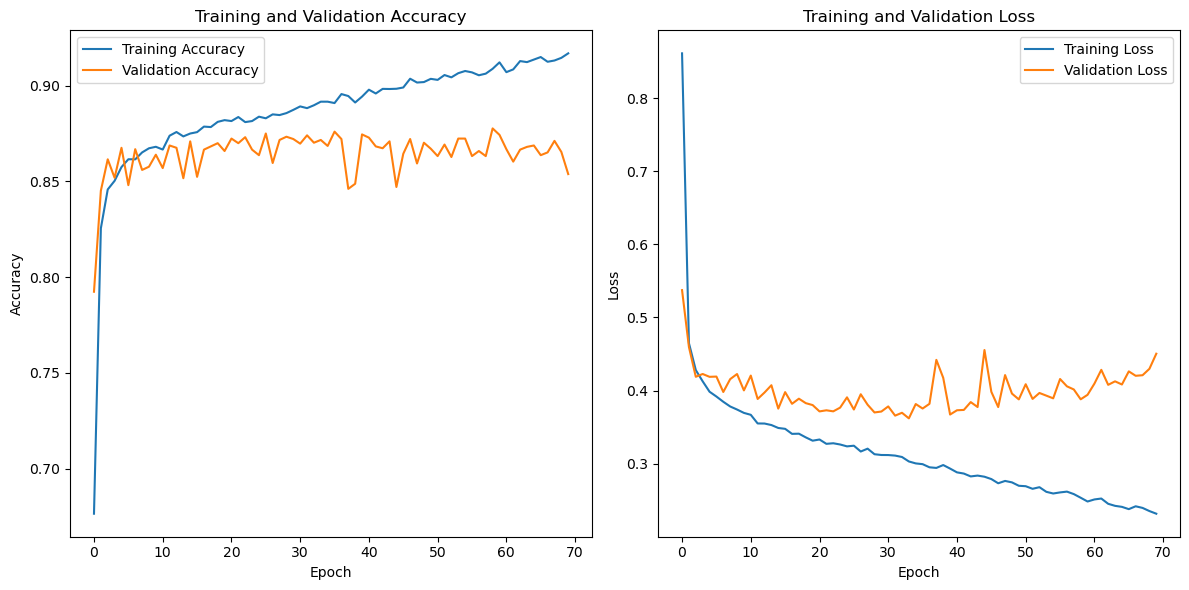

In [55]:
history = model.fit(x_train, y_train, epochs=70, validation_data=(x_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
testing=pd.read_csv('test.csv')

In [206]:
testing

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [207]:
testing['bmi']=testing['Weight']/testing['Height']/testing['Height']
bins = [0, 18, 24, 30, 40,60]  
labels = ['insuffisant', 'normal', 'over', 'obese','massive']


testing['bmi_type'] = pd.cut(testing['bmi'], bins=bins, labels=labels)


In [208]:
columns_to_transform=[]
for c in testing.columns:
    if testing[c].dtype=='object' or testing[c].dtype=='category' :
         columns_to_transform.append(c)


for col in columns_to_transform:
    testing[col] = le.fit_transform(testing[col])

In [209]:
ids=testing['id']

In [210]:
testing.drop('id',axis=1,inplace=True)

In [211]:

T = scaler.fit_transform(testing)

testing = pd.DataFrame(T, columns=testing.columns)

testing.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi,bmi_type
0,1.0,0.274466,0.751498,0.647675,1.0,1.0,0.969308,0.666667,0.666667,0.0,0.912815,0.0,0.285133,0.000000,0.666667,0.75,0.585777,0.75
1,0.0,0.148936,0.283019,0.214188,1.0,1.0,0.500000,0.000000,0.666667,0.0,1.000000,0.0,0.333333,0.000000,0.666667,0.75,0.337588,1.00
2,0.0,0.255319,0.364821,0.575933,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.810939,0.0,0.000000,0.125251,0.666667,0.75,0.742193,0.25
3,1.0,0.148495,0.194579,0.513014,1.0,1.0,0.500000,0.659303,0.666667,0.0,0.893209,0.0,0.031617,0.000000,0.666667,0.75,0.785219,0.25
4,0.0,0.255319,0.334709,0.522265,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.826766,0.0,0.000000,0.370534,0.666667,0.75,0.696899,0.75


In [212]:
testing.shape

(13840, 18)

In [218]:
testing_res=model.predict(testing)
testing_res

433/433 [==============================] - 1s 1ms/step


array([[4.8911824e-07, 1.8051543e-07, 1.6233876e-02, ..., 1.4688713e-03,
        3.6712128e-05, 2.7555137e-04],
       [1.0351620e-03, 2.1304321e-02, 1.9891389e-02, ..., 1.2528383e-04,
        7.9691541e-01, 1.6071938e-01],
       [1.8250067e-07, 8.9112945e-08, 8.0042752e-04, ..., 9.9916005e-01,
        2.2015702e-06, 2.9806058e-06],
       ...,
       [9.3960989e-01, 5.8925871e-02, 1.1651215e-05, ..., 6.1111227e-06,
        1.3765740e-03, 6.9779402e-05],
       [3.0746353e-01, 6.7730290e-01, 7.4303214e-05, ..., 5.7090524e-06,
        1.4263159e-02, 8.9026522e-04],
       [1.8048473e-07, 6.1825332e-08, 6.6790590e-03, ..., 3.6073395e-04,
        1.3287323e-05, 1.3189975e-04]], dtype=float32)

In [219]:
class_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
                'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
                'Overweight_Level_II']
max_index = np.argmax(testing_res, axis=1)

# Create a DataFrame with all zeros
predictions_df = pd.DataFrame(0, index=np.arange(len(testing_res)), columns=class_labels)

# Set the corresponding column to 1 for each row
predictions_df.values[np.arange(len(testing_res)), max_index] = 1
predictions_df

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
13835,0,0,0,0,0,0,1
13836,0,0,0,0,0,1,0
13837,1,0,0,0,0,0,0
13838,0,1,0,0,0,0,0


In [224]:
predictions_df['NObeyesdad'] = predictions_df.idxmax(axis=1)

predictions_df.drop(columns=predictions_df.columns[:-1], inplace=True)

predictions_df

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_III
4,Obesity_Type_III
...,...
13835,Overweight_Level_II
13836,Overweight_Level_I
13837,Insufficient_Weight
13838,Normal_Weight


In [227]:
predictions_df['id']=ids

In [229]:
c=['id','NObeyesdad']
predictions_df = predictions_df[c]
predictions_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_III
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [232]:
predictions_df.to_csv("sub1",index=0)

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

def forward_selection(X, y):
    # Initialize an empty set to store selected features
    selected_features = []
    best_accuracy = 0
    
    while True:
        best_feature = None
        best_accuracy_for_feature = 0
        feature_added = False
        
        # Iterate over the remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Add the feature to the selected set
                current_features = selected_features + [feature]
                
                # Split data into train and test sets
                X_subset = X[current_features]
                X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
                
                # Train Random Forest Classifier
                clf = RandomForestClassifier(n_estimators=100, random_state=42)
                clf.fit(X_train, y_train)
                
                # Test accuracy on test set
                y_pred = clf.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                
                # Check if adding the feature improves accuracy
                if accuracy > best_accuracy_for_feature:
                    best_accuracy_for_feature = accuracy
                    best_feature = feature
                    feature_added = True
        
        # If adding a feature improves accuracy, add it to selected features
        if feature_added:
            selected_features.append(best_feature)
            best_accuracy = best_accuracy_for_feature
            print("Selected features:", selected_features)
            print("Current accuracy:", best_accuracy)
            print()
        else:
            break
    
    return selected_features

selected_features = forward_selection(X, y)
print("Final selected features:", selected_features)


Selected features: ['bmi']
Current accuracy: 0.7680635838150289

Selected features: ['bmi', 'Height']
Current accuracy: 0.8395953757225434

Selected features: ['bmi', 'Height', 'Gender']
Current accuracy: 0.8566955684007708

Selected features: ['bmi', 'Height', 'Gender', 'CALC']
Current accuracy: 0.8576589595375722

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'Weight']
Current accuracy: 0.8605491329479769

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'Weight', 'MTRANS']
Current accuracy: 0.8631984585741811

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'Weight', 'MTRANS', 'FAF']
Current accuracy: 0.8670520231213873

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'Weight', 'MTRANS', 'FAF', 'NCP']
Current accuracy: 0.8694605009633911

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'Weight', 'MTRANS', 'FAF', 'NCP', 'family_history_with_overweight']
Current accuracy: 0.8716281310211946

Selected features: ['bmi', 'Height', 'Gender', 'CALC', 'We

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test each classifier
accuracies = {}
for name, classifier in classifiers.items():
    multi_output_classifier = MultiOutputClassifier(classifier)
    multi_output_classifier.fit(X_train, y_train)
    y_pred = multi_output_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Find the classifier with the maximum accuracy
max_accuracy_classifier = max(accuracies, key=accuracies.get)
print(f"\nClassifier with Maximum Accuracy: {max_accuracy_classifier} ({accuracies[max_accuracy_classifier]})")


Random Forest Accuracy: 0.8771676300578035
Decision Tree Accuracy: 0.7757707129094412
Naive Bayes Accuracy: 0.4241329479768786


C:\Users\Wael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Wael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Wael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Wael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.8446531791907514
AdaBoost Accuracy: 0.8424855491329479
Gradient Boosting Accuracy: 0.8684971098265896
XGBoost Accuracy: 0.880057803468208

Classifier with Maximum Accuracy: XGBoost (0.880057803468208)


In [258]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Train final model with best parameters
final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, y_train)


Fitting 2 folds for each of 243 candidates, totalling 486 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [260]:
y_pred = final_xgb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f" Accuracy: {accuracy}")

 Accuracy: 0.9052149825364326
